In [1]:
!pip install fglib


In [ ]:
import numpy as np 
import networkx as nx
from fglib import graphs, nodes, rv , inference

In [ ]:
    # Create factor graph
    fg = graphs.FactorGraph()

    # Create variable nodes
    x1 = nodes.VNode("x1", rv.Discrete)
    x2 = nodes.VNode("x2", rv.Discrete)
    x3 = nodes.VNode("x3", rv.Discrete)
    x4 = nodes.VNode("x4", rv.Discrete)
    x5 = nodes.VNode("x5", rv.Discrete)
    x6 = nodes.VNode("x6", rv.Discrete)
    x7 = nodes.VNode("x7", rv.Discrete)
    x8 = nodes.VNode("x8", rv.Discrete)
    x9 = nodes.VNode("x9", rv.Discrete)
    
    y1 = nodes.VNode("y1", rv.Discrete)
    y2 = nodes.VNode("y2", rv.Discrete)
    y3 = nodes.VNode("y3", rv.Discrete)
    y4 = nodes.VNode("y4", rv.Discrete)
    y5 = nodes.VNode("y5", rv.Discrete)
    y6 = nodes.VNode("y6", rv.Discrete)
    y7 = nodes.VNode("y7", rv.Discrete)
    y8 = nodes.VNode("y8", rv.Discrete)
    y9 = nodes.VNode("y9", rv.Discrete)
    
    # Create factor nodes
    f11 = nodes.FNode("f11")
    f22 = nodes.FNode("f22")
    f33 = nodes.FNode("f33")
    f44 = nodes.FNode("f44")
    f55 = nodes.FNode("f55")
    f66 = nodes.FNode("f66")
    f77 = nodes.FNode("f77")
    f88 = nodes.FNode("f88")
    f99 = nodes.FNode("f99")
    
    f12 = nodes.FNode("f12")
    f23 = nodes.FNode("f23")
    f14 = nodes.FNode("f14")
    f25 = nodes.FNode("f25")
    f36 = nodes.FNode("f36")
    f45 = nodes.FNode("f45")
    f56 = nodes.FNode("f56")
    f47 = nodes.FNode("f47")
    f58 = nodes.FNode("f58")
    f69 = nodes.FNode("f69")
    f78 = nodes.FNode("f78")
    f89 = nodes.FNode("f89")

    # Add nodes to factor graph
    fg.set_nodes([x1, x2, x3, x4, x5, x6, x7, x8, x9, y1, y2, y3, y4, y5, y6, y7, y8, y9])
    fg.set_nodes([f11, f22, f33, f44, f55, f66, f77, f88, f99, f12, f23, f14, f25, f36, f45, 
                  f56, f47, f58, f69, f78, f89 ])

    # Add edges to factor graph
    fg.set_edge(x1, f11)
    fg.set_edge(f11, y1)
    
    fg.set_edge(x2, f22)
    fg.set_edge(f22, y2)
    
    fg.set_edge(x3, f33)
    fg.set_edge(f33, y3)
    
    fg.set_edge(x4, f44)
    fg.set_edge(f44, y4)
    
    fg.set_edge(x5, f55)
    fg.set_edge(f55, y5)
    
    fg.set_edge(x6, f66)
    fg.set_edge(f66, y6)
    
    fg.set_edge(x7, f77)
    fg.set_edge(f77, y7)
    
    fg.set_edge(x8, f88)
    fg.set_edge(f88, y8)
    
    fg.set_edge(x9, f99)
    fg.set_edge(f99, y9)
    
    
    fg.set_edge(x1, f12)
    fg.set_edge(f12, x2)
    
    fg.set_edge(x2, f23)
    fg.set_edge(f23, x3)
    
    fg.set_edge(x1, f14)
    fg.set_edge(f14, x4)
    
    fg.set_edge(x2, f25)
    fg.set_edge(f25, x5)
    
    fg.set_edge(x3, f36)
    fg.set_edge(f36, x6)
    
    fg.set_edge(x4, f45)
    fg.set_edge(f45, x5)
    
    fg.set_edge(x5, f56)
    fg.set_edge(f56, x6)
    
    fg.set_edge(x4, f47)
    fg.set_edge(f47, x7)
    
    fg.set_edge(x5, f58)
    fg.set_edge(f58, x8)
    
    fg.set_edge(x6, f69)
    fg.set_edge(f69, x9)

    fg.set_edge(x7, f78)
    fg.set_edge(f78, x8)
    
    fg.set_edge(x8, f89)
    fg.set_edge(f89, x9)

    #Add potentials
    
    
    
    
    #add potential for f_3: p(x3)
    dist_f3 = [0.5, 0.5]
    f3.factor = rv.Discrete(dist_f3,x3)
    
    #add potential for f_4: p(x4)
    dist_f4 = [0.4,0.6]
    f4.factor = rv.Discrete(dist_f4,x4)
    
    # add potential for f_{234}: p(x2, x3, x4) = p(x2|x3,x4) p(x3,x4)
    px3x4=np.outer(dist_f3,dist_f4)
    px3x4=np.reshape(px3x4, np.shape(px3x4)+(1,))
    px2_conditioned_x3x4=[[[0.2,0.8],
                         [0.25,0.75],],
                         [[0.7,0.3],
                         [0.3,0.7]]]
    
    dist_f234 =px3x4*px2_conditioned_x3x4
    f234.factor = rv.Discrete(dist_f234,x3,x4,x2)
   
    # add potential for f_{12}:  p (x1,x2) = p(x1 | x2) p(x2)
    px1_conditioned_x2 = [[0.5,0.5],
                         [0.7,0.3]]
    px2= np.sum(dist_f234, axis=(0,1))
    dist_f12 =px2[:,np.newaxis]*px1_conditioned_x2
    f12.factor = rv.Discrete(dist_f12,x2,x1)
    
    # fglib sum-product algorithm
    fglib_beliefs = inference.belief_propagation(fg, query_node=x1)
    print(fglib_beliefs)

In [7]:
#!/usr/bin/env python3
# a python library for loopy belief propagation

import numpy

# note: coordinates are assumed to be such that "y" increases "downwards",
# and "x" increases "rightwards".
# arrays will generally be indexed as array[y][x].

# diretions are as indexed in arrays,
# defined as pseudo-constants here for convenience.
# base comes last as it's not used in the working array.
RIGHT = 0
UP = 1
LEFT = 2
DOWN = 3
BASE = 4
DIRECTIONS = {"right":RIGHT, "up":UP, "left":LEFT, "down":DOWN, "base":BASE}


class MRF():
    """A Markov Random Field,
    with methods to apply Loopy Belief Propagation.
    """

    def __init__(self, height, width, num_beliefs,
                 base_belief=None, smoothness=None):
        """Initialize the MRF with given height, width and number of beliefs.
        
        If base_belief and smoothness arrays are not provided,
        init_base_belief() and init_smoothness() must be called manually
        before calling pass_messages().
        """

        # basic dimensions
        self.width = width
        self.height = height
        self.num_beliefs = num_beliefs

        # main data array
        self.data = numpy.ones(
            shape = (height, width, 5, self.num_beliefs),
            dtype = numpy.float32 )
        self.data /= self.num_beliefs

        # working array
        self._working = numpy.ones(
            shape = (height, width, 4, self.num_beliefs, self.num_beliefs),
            dtype = numpy.float32 )
        self._working /= self.num_beliefs

        # belief storage arrays
        self._beliefprod = numpy.ndarray(
            shape = (height, width, num_beliefs),
            dtype = numpy.float32 )
        self._belief = numpy.ndarray(
            shape = (height, width),
            dtype = numpy.int )

        # normalization temporary storage array
        self._sumstorage = numpy.ndarray(
            shape = (height, width),
            dtype = numpy.float32 )

        # initialize base belief and smoothness arrays, if provided.
        if base_belief is not None:
            self.init_base_belief(base_belief)
        if smoothness is not None:
            self.init_smoothness(smoothness)

        # note that filling the data arrays with ones is important,
        # as messages from outside the array will not be modified.
        # that is, the messages from the outer edge pointing inwards
        # are never updated from their initial values here.
        # initializing to 1 means they have no effect when multiplying,
        # letting us avoid special-casing edge behaviour.

        # all data arrays are also normalized across possible beliefs,
        # for convenience and stability


    def init_base_belief(self, base_beliefs):
        """Initialize the base belief channel.

        Input should have the same height, width, and number of beliefs
        as the underlying MRF.

        Values should be the relative likelihood of each belief possibility.
        """

        # perform basic sanity checks and fail noisily
        if len(base_beliefs) != len(self.data) \
        or len(base_beliefs[0]) != len(self.data[0]):
            raise Exception("belief dimensions (%s,%s) don't match MRF dimensions (%s,%s)" % (len(base_beliefs), len(base_beliefs[0]), len(self.data), len(self.data[0])))
        if len(base_beliefs[0][0]) != len(self.data[0][0][0]):
            raise Exception("number of belief possibilities must match MRF")

        # now normalize the data while copying it in
        self.data[:,:,DIRECTIONS["base"],:] = base_beliefs * (
                1 / numpy.sum(base_beliefs,axis=2,keepdims=True) )


    def init_smoothness(self, smoothness):
        """Initialize the smoothness array.
        
        It should have dimension num_beliefs * num_beliefs,
        and ideally be symmetric.
        """
        
        # fail noisily
        if len(smoothness) != self.num_beliefs \
        or len(smoothness[0]) != self.num_beliefs:
            raise Exception("smoothness array should be %s by %s" %
                            (self.num_beliefs, self.num_beliefs))

        # normalize and store the smoothness array
        self.smoothness = smoothness * (1 / numpy.sum(smoothness,axis=1,keepdims=True) )


    def pass_messages(self, direction=None):
        """Pass messages in the specified direction.
        
        If no direction is specified, messages are passed in all directions.
        Right, then up, then left, then down.
        """

        # if no direction specified, pass in each direction
        if direction is None:
            self.pass_messages(RIGHT)
            self.pass_messages(UP)
            self.pass_messages(LEFT)
            self.pass_messages(DOWN)
            return

        # otherwise interpret the given direction.
        # As we will be passing messages across pairs in some direction,
        # the working area is smaller by one pixel in that axis,
        # and shifted by one pixel between from and to.
        # If we represent the from and to areas with slices,
        # indices and sizes will match up perfectly.
        # The direction of message passing and its opposite are also stored,
        # as later we discount messages from the pixel we're passing to.
        if direction == RIGHT:
            working_slice = self._working[:,:-1,RIGHT]
            from_slice = self.data[:,:-1]
            to_slice = self.data[:,1:]
            from_dir = LEFT
            to_dir = RIGHT
            storage = self._sumstorage[:,1:]
        elif direction == UP:
            working_slice = self._working[1:,:,UP]
            from_slice = self.data[1:,:]
            to_slice = self.data[:-1,:]
            from_dir = DOWN
            to_dir = UP
            storage = self._sumstorage[:-1,:]
        elif direction == LEFT:
            working_slice = self._working[:,1:,LEFT]
            from_slice = self.data[:,1:]
            to_slice = self.data[:,:-1]
            from_dir = RIGHT
            to_dir = LEFT
            storage = self._sumstorage[:,:-1]
        elif direction == DOWN:
            working_slice = self._working[:-1,:,DOWN]
            from_slice = self.data[:-1,:]
            to_slice = self.data[1:,:]
            from_dir = UP
            to_dir = DOWN
            storage = self._sumstorage[1:,:]
        elif direction == BASE:
            raise Exception("can't pass messages to base belief channel")
        else:
            raise Exception("invalid direction index: %s" % direction)

        # for now the algorithm used is the "sum-product" algorithm.
        # it goes as follows:
        #
        # for each pixel (x,y coord)
        # for each direction (left/right/up/down)
        # we're passing a message.
        # The message is a vector assigning weights to each belief possibility.
        # To calculate each element of the message,
        # multiply the base probability of this element given the data
        # by the sum over all belief possibilities of
        # the product of
        #       the similarity of this possibility to the message element
        # and   the product of the beliefs regarding this element
        #       in all incoming messages
        #       OTHER than the one from the pixel we're sending to,
        # then normalize and send the message.

        # here goes the implementation.

        # first initialize our working area with the smoothness function.
        # The order of multiplication doesn't actually matter here,
        # but this is as good a place to start as any.
        # We slice the slice so that numpy copies into the existing memory,
        # in stead of just making 'working_slice' a refrence to smoothness.
        # This will copy the smoothness array into the working area
        # for every pixel in our working slice.
        working_slice[:] = self.smoothness

        # multiply by the base data.
        # This weights the output elements according to the base belief.
        # we want working_slice[i] *= base_data[i] for i in num_beliefs,
        # so we need to mess with the axes a little,
        # but we can do that by adding an axis to the base belief data,
        # which should be efficiently done by numpy.
        # (no new memory allocations here, AFAIK.)
        working_slice[:] *= from_slice[:,:,BASE,:,numpy.newaxis]

        # the three messages not from the direction we're sending to
        # will each be multiplied into our extra working dimension,
        # which will be summed in the next step.
        # Because we initialized with the smoothness array,
        # these are automatically being weighted by our smoothness function.
        # We need to specify the axis to broadcast here as well,
        # but it's transposed relative to the base data.
        for d in (RIGHT, UP, LEFT, DOWN):
            # don't include the message from the pixel we're sending to
            if d == to_dir: continue
            # but do include the other three
            working_slice[:] *= from_slice[:,:,d,numpy.newaxis,:]

        # sum the extra working axis to get the message we want.
        # Using numpy's sum function lets us sum directly into the output.
        # Axes 0 and 1 are the x and y coordinates of each pixel,
        # axis 2 is the desired output axis,
        # so we sum across axis 3.
        # (note that axes 2 and 3 could have been swapped,
        # this just needs to be consistent with the operations above.)
        numpy.sum(working_slice, axis=3, out=to_slice[:,:,from_dir])

        # now normalize the message.
        # This does not change the belief,
        # but if we do not normalize, values will decrease each iteration
        # until floating point limits are hit.
        numpy.sum(to_slice[:,:,from_dir], axis=2, out=storage)
        numpy.reciprocal(storage, out=storage)
        to_slice[:,:,from_dir] *= storage[:,:,numpy.newaxis]

    def calc_belief(self):
        """Calculate the index of the most likely belief at each pixel.
        """
        # reuses storage, if you want to keep it, copy it
        self.data.prod(axis=2, out=self._beliefprod)
        self._beliefprod.argmax(axis=2, out=self._belief)
        return self._belief

    def __repr__(self):
        """Represent the MRF by it's data for now.
        """
        return repr(self.data)

right image 382 x 286, 4 channels
left image 382 x 286, 4 channels
generating base belief
showing initial MRF belief... showing final MRF belief... 

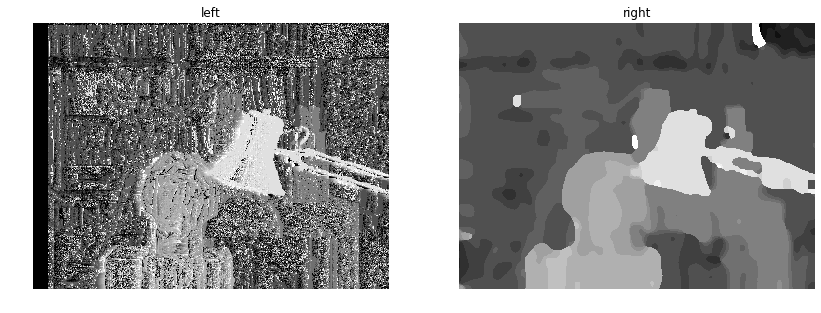

In [25]:
import os, fnmatch
import numpy
import matplotlib.image
import matplotlib.pyplot as plt
import math
from os import walk

def smoothfunc(d):
    d = abs(d)
    return math.exp(-(d**2))

def howsmooth(a,b,threshold=0.1):
    if smoothfunc(a-b) > threshold: return smoothfunc(a-b)
    else: return threshold

def display(whatever, pause=False, matrix=False):
    matplotlib.pyplot.clf()
    if matrix:
        matplotlib.pyplot.matshow(whatever, fignum=0)
    else:
        matplotlib.pyplot.imshow(whatever)
    matplotlib.pyplot.draw()
    if pause: input()


#set basic display options
numpy.set_printoptions(precision=3)

#numpy.set_printoptions(linewidth=135)
matplotlib.pyplot.ion()
    
num_beliefs  = 16
bp_num_iters = 20

mypath="/Users/ambujojha/Documents/inferenceAndRepresentation/Disparity/data"
for root, dirs, files in os.walk(mypath): 
    for dir in dirs:
        #print(dir)

        if "tsukuba" not in dir:
            continue

        listOfFiles = os.listdir(mypath + "/" + dir)
        pattern = "*.png"
        for entry in listOfFiles:
            if fnmatch.fnmatch(entry, pattern):
                #print (entry)
                
                if "0" in entry:
                    input_left = matplotlib.image.imread(mypath+"/"+dir+"/"+entry)
                    print("left image %s x %s, %s channels" % (len(input_left[0]), len(input_left), len(input_left[0][0])))
                if "1" in entry:
                    input_right = matplotlib.image.imread(mypath+"/"+dir+"/"+entry)
                    print("right image %s x %s, %s channels" % (len(input_right[0]), len(input_right), len(input_right[0][0])))
                
                    
        height = len(input_left)
        width = len(input_left[0])
        mrf = MRF(height, width, num_beliefs)
                
        print("generating base belief")
        base_belief = numpy.ones(shape=(height,width,num_beliefs), dtype=numpy.float32)
        for b in range(num_beliefs):
            left_slice = input_left[:,num_beliefs-1:]
            right_slice = input_right[:,num_beliefs-1-b:width-b]

            diff = left_slice - right_slice
            numpy.square(diff, out=diff)
            norm = numpy.sum(diff, axis=2)
            numpy.sqrt(norm, out=norm)
            numpy.negative(norm, out=norm)
            numpy.exp(norm, out=norm)
            base_belief[:,num_beliefs-1:,b] = norm
                    
        base_belief[:,:] *= (1 / numpy.sum(base_belief[:,:],axis=2)[:,:,numpy.newaxis] )

        smoothness = numpy.ndarray(shape=(num_beliefs,num_beliefs), dtype=numpy.float32)
        for a in range(num_beliefs):
            for b in range(num_beliefs):
                smoothness[a][b] = howsmooth(a,b)
                
        mrf.init_base_belief(base_belief)
        mrf.init_smoothness(smoothness)
        
        print("showing initial MRF belief...",end=' ',flush=True)
        #matplotlib.pyplot.imshow(mrf.calc_belief())
        
        fig, axes = plt.subplots(1, 2, figsize=(14,5))
        axes[0].imshow(mrf.calc_belief(), cmap='gray')
        axes[0].set_title('left')
        axes[0].axis('off')
        
        
        for i in range(bp_num_iters):
            mrf.pass_messages()

        print("showing final MRF belief...",end=' ',flush=True)
        #matplotlib.pyplot.imshow(mrf.calc_belief())
        
        axes[1].imshow(mrf.calc_belief(), cmap='gray')
        axes[1].set_title('right')
        axes[1].axis('off')
        plt.show()

In [45]:
from disparity import util

def softmax(X, theta=1.0, axis=None):
    # make X at least 2d
    y = np.atleast_2d(X)
    # find axis
    if axis is None:
        axis = next(j[0] for j in enumerate(y.shape) if j[1] > 1)
    # multiply y against the theta parameter,
    y = y * float(theta)
    # subtract the max for numerical stability
    y = y - np.expand_dims(np.max(y, axis=axis), axis)
    # exponentiate y
    y = np.exp(y)
    # take the sum along the specified axis
    ax_sum = np.expand_dims(np.sum(y, axis=axis), axis)
    # finally: divide elementwise
    p = y / ax_sum
    # flatten if X was 1D
    if len(X.shape) == 1:
        p = p.flatten()

    return p

def get_probs(energies):
    h,w,n = energies.shape
    energies = energies.reshape((h*w,n))
    energies = np.transpose(energies)
    energies = energies.max(axis=0) - energies
    probs = softmax(energies, axis=0)
    probs = probs.reshape((n,h,w))
    probs = np.transpose(probs, axes=[1,2,0])
    
    return probs


def smoothfunc(d):
    d = abs(d)
    return math.exp(-(d**2))

def howsmooth(a,b,threshold=0.1):
    if smoothfunc(a-b) > threshold: return smoothfunc(a-b)
    else: return threshold

def display(whatever, pause=False, matrix=False):
    matplotlib.pyplot.clf()
    if matrix:
        matplotlib.pyplot.matshow(whatever, fignum=0)
    else:
        matplotlib.pyplot.imshow(whatever)
    matplotlib.pyplot.draw()
    if pause: input()



right image 382 x 286, 4 channels
left image 382 x 286, 4 channels
disparity.shape (286, 382)
energies.shape (286, 382, 16)
energies.shape, after normalization (286, 382, 16)


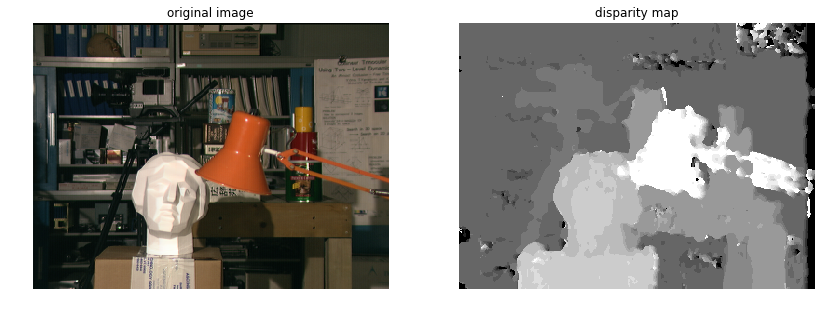

/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:240: RuntimeWarning: divide by zero encountered in reciprocal
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:240: RuntimeWarning: overflow encountered in reciprocal
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:241: RuntimeWarning: invalid value encountered in multiply
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:224: RuntimeWarning: invalid value encountered in multiply


showing final MRF belief... 

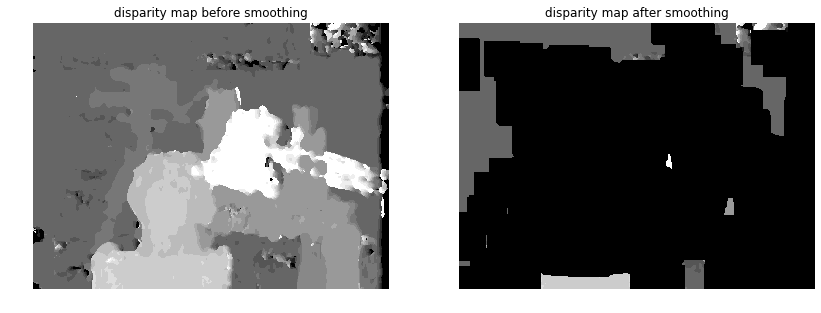

In [44]:
from __future__ import division, print_function
import sys
import argparse
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os, fnmatch
import numpy
import matplotlib.image
import matplotlib.pyplot as plt
import math
from os import walk

sys.path.append('..')
from disparity.util import vgg_features
from disparity.cnn_disparity import compute_cnn_disparity, compute_cnn_energies


#set basic display options
numpy.set_printoptions(precision=3)

#numpy.set_printoptions(linewidth=135)
matplotlib.pyplot.ion()
    
num_beliefs  = 16
bp_num_iters = 20

mypath="/Users/ambujojha/Documents/inferenceAndRepresentation/Disparity/data"
for root, dirs, files in os.walk(mypath): 
    for dir in dirs:
        #print(dir)

        if "tsukuba" not in dir:
            continue

        listOfFiles = os.listdir(mypath + "/" + dir)
        pattern = "*.png"
        for entry in listOfFiles:
            if fnmatch.fnmatch(entry, pattern):
                #print (entry)
                
                if "0" in entry:
                    input_left = matplotlib.image.imread(mypath+"/"+dir+"/"+entry)
                    print("left image %s x %s, %s channels" % (len(input_left[0]), len(input_left), len(input_left[0][0])))
                    image_left = cv2.imread(mypath+"/"+dir+"/"+entry)[:,:,::-1]
                if "1" in entry:
                    input_right = matplotlib.image.imread(mypath+"/"+dir+"/"+entry)
                    print("right image %s x %s, %s channels" % (len(input_right[0]), len(input_right), len(input_right[0][0])))
                    image_right = cv2.imread(mypath+"/"+dir+"/"+entry)[:,:,::-1]

        disparity = compute_cnn_disparity(
            image_left, image_right, numDisparities=16
        )
        
        print ("disparity.shape", disparity.shape)
        energies = compute_cnn_energies(
            image_left, image_right, numDisparities=16)
        print ("energies.shape", energies.shape)
        
        #energy_probs = get_probs(energies)

        energies = energies.max() - energies
        energies[:,:] *= (1 / numpy.sum(energies[:,:],axis=2)[:,:,numpy.newaxis] )
        
        print ("energies.shape, after normalization", energies.shape)
        
        # visualize
        fig, axes = plt.subplots(1,2,figsize=(14,5))
        axes[0].imshow(image_right, cmap='gray')
        axes[0].axis('off')
        axes[0].set_title('original image')
        axes[1].imshow(disparity, cmap='gray')
        axes[1].axis('off')
        axes[1].set_title('disparity map')
        plt.show()

        height = len(input_left)
        width = len(input_left[0])
        mrf = MRF(height, width, num_beliefs)
        
        smoothness = numpy.ndarray(shape=(num_beliefs,num_beliefs), dtype=numpy.float32)
        for a in range(num_beliefs):
            for b in range(num_beliefs):
                smoothness[a][b] = howsmooth(a,b)
        
        mrf.init_base_belief(energy_probs)
        mrf.init_smoothness(smoothness)
        
        #print("showing initial MRF belief...",end=' ',flush=True)
        #matplotlib.pyplot.imshow(mrf.calc_belief())
        
        fig, axes = plt.subplots(1, 2, figsize=(14,5))
        axes[0].imshow(mrf.calc_belief(), cmap='gray')
        axes[0].set_title('disparity map before smoothing')
        axes[0].axis('off')
        
        
        for i in range(bp_num_iters):
            mrf.pass_messages()

        print("showing final MRF belief...",end=' ',flush=True)
        #matplotlib.pyplot.imshow(mrf.calc_belief())
        
        axes[1].imshow(mrf.calc_belief(), cmap='gray')
        axes[1].set_title('disparity map after smoothing')
        axes[1].axis('off')
        plt.show()